# SIMPLE GENERATOR FOR GRID WORLDS

In [70]:
# DEFINE RELEVANT FUNCTIONS
import numpy as np
import matplotlib.pyplot as plt

class Grid:
    """ This class defines a grid environment with the relevant action
    space and game mechanics """
    def __init__(self, s=10, g=1, start_p=1):
        self.grid = self.get_grid(s)
        self.size = s
        self.actions = self.define_actions()
        self.done = False
    
    def get_grid(self,s):
        x = np.zeros([s,s])
        goal = np.random.randint(0,s-1,2)
        start = np.random.randint(0,s-1,2)
        while any(goal==start):
            goal = np.random.randint(0,s-1,2)
        x[goal[0],goal[1]] = 1
        self.goal = goal
        x[start[0],start[1]] = -1
        self.start = start
        return x
    
    def reset(self):
        self.play_pos = self.start
        self.reward = 0
        self.done = False
    
    def advance(self,action):
        new_pos = self.play_pos + self.actions[action]
        self.reward -= 1
        if not self.bounce(new_pos):
            self.play_pos = new_pos
        # Check if goal reached
        self.is_goal()
        return self.get_observation()
            
    
    def is_goal(self):
        if self.play_pos[0] == self.goal[0] and self.play_pos[1] == self.goal[1]:
            self.done = True
    
    def bounce(self,new_pos):   
        if new_pos[0] > self.size-1 or new_pos[0] < 0:
            return True
        if new_pos[1] > self.size-1 or new_pos[1] < 0:
            return True
        return False
        
        
    def define_actions(self):
        return dict(
            LEFT=[0,-1],
            UP=[-1,0],
            RIGHT=[0,1],
            DOWN=[1,0],
        )
    
    def get_successor(self,action):
        new_pos = self.play_pos + self.actions[action]
        if self.bounce(new_pos):
            return self.play_pos
        else:
            return new_pos

    def get_observation(self):
        return self.play_pos[0] + (self.play_pos[1] * self.size) + 1
    

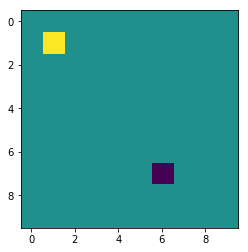

In [72]:
g = Grid(10)
plt.imshow(g.grid)
plt.show()

In [82]:
# INITIALIZE
Q = np.zeros([g.size**2,4])
rlist = []
lrate = 0.2
y = 0.95
eps = 0.1
d = {0:"DOWN",1:"LEFT",2:"RIGHT",3:"UP"}
n_episodes = 2000

# RUN THIS OVER SOME EPISODES
for i in range(n_episodes):
    g.reset()
    j = 0
    # STOP AFTER 99 STEPS IF GOAL NOT FOUND
    while j < 99:
        j+=1
        # Get current state
        s = g.get_observation()
        # Random or guided choice?
        if np.random.rand() < eps:
            a = np.random.randint(0,3)
        else:
            a = np.argmax(Q[s-1,:])
        action = d[a]
        # Take action
        s1 = g.advance(action)
        # Update Q values for next turn
        Q[s-1,a] = Q[s-1,a] + lrate * (-1 + y*np.max(Q[s1-1,:] - Q[s-1,a]))
        if g.done == True:
            if np.mod(i,100) == 0:
                eps = eps * 0.90
            break
    rlist.append(g.reward)

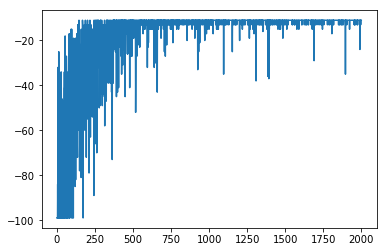

In [83]:
plt.plot(np.arange(0,n_episodes),rlist)
plt.show()

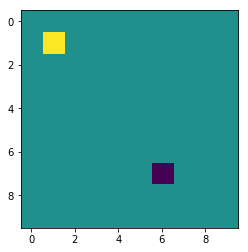

In [75]:
plt.imshow(g.grid)
plt.show()

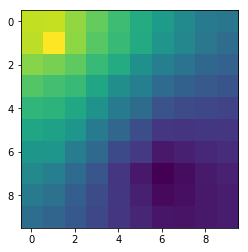

In [84]:
plt.imshow(np.transpose(np.reshape(np.mean(Q,1),[g.size,g.size])))
plt.show()